<a href="https://colab.research.google.com/github/esprado1976/data_files/blob/main/ProyectoDSParteI%2BPRADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Resumen Numérico (Estadísticas Descriptivas) ---
            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed   Humidity9am   Humidity3pm   Pressure9am   Pressure3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     65.874123     49.601985   1017.239505   1014.79558

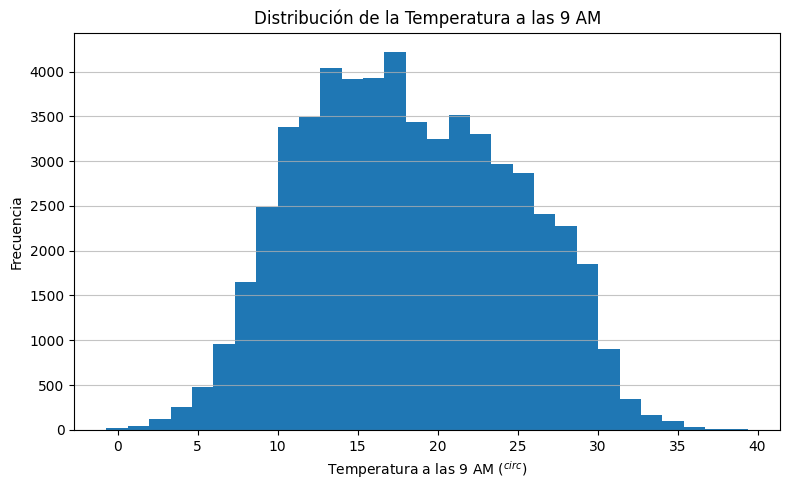

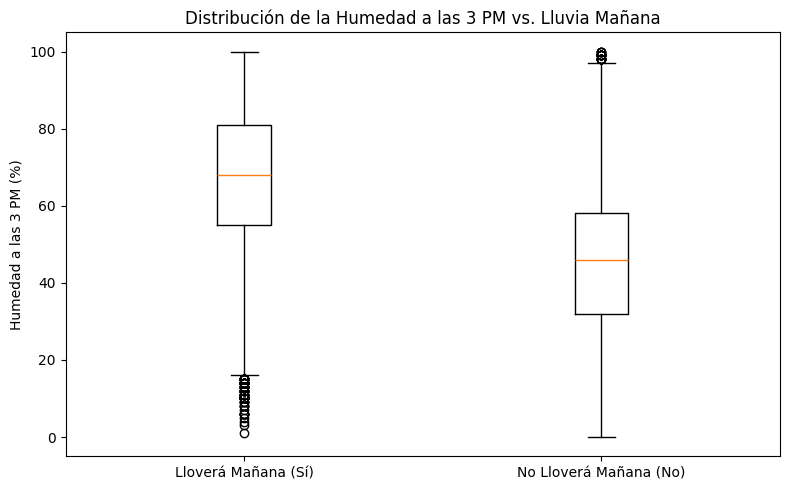

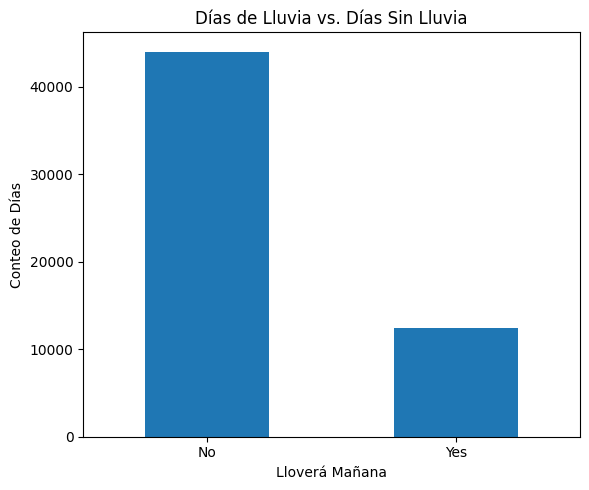

In [11]:
# ABSTRACT
# El presente estudio tiene como objetivo principal realizar un Análisis Exploratorio de Datos (EDA) sobre el dataset australiano
# weatherAUS.csv, con un enfoque en la predicción de lluvia al día siguiente (RainTomorrow). Australia, un continente con una geografía
# y climas vastos y variados, presenta un desafío interesante para la modelización meteorológica.El dataset seleccionado contiene
# más de 145.000 observaciones diarias de múltiples estaciones meteorológicas en Australia, cubriendo un periodo de diez años. Cada
# registro incluye variables meteorológicas clave como la temperatura mínima y máxima, la precipitación (Rainfall), la evaporación,
# la velocidad y dirección del viento, la presión atmosférica y la humedad.La fase de preprocesamiento inicial se centra en la eliminación
# de registros con valores faltantes, creando un subconjunto de datos limpios y completos para el análisis. La consigna principal de este
# análisis es identificar los factores meteorológicos clave que presentan la mayor correlación e influencia en el evento binario de la
# lluvia al día siguiente. Se emplearán técnicas de visualización (histogramas, diagramas de caja y gráficos de barras) y resúmenes
# numéricos (estadísticas descriptivas) para explorar la distribución de las variables y sus relaciones bivariadas con la variable objetivo.
# Los hallazgos de este EDA servirán como base para una potencial fase de Machine Learning, proporcionando información valiosa sobre las
# características más predictivas del clima australiano.
# Pregunta Problema¿Cuáles son los principales factores meteorológicos (humedad, temperatura, velocidad del viento o presión) que influyen
# de manera más significativa en la probabilidad de que llueva al día siguiente (RainTomorrow) en Australia?.
# Hipótesis de Interés
# H1 (Humedad): La humedad relativa a las 3PM (Humidity3pm) estará significativamente más alta en los días en que sílloverá al día siguiente (RainTomorrow = 'Yes') en comparación con los días en que no lloverá.
# H2 (Viento y Presión): Una alta velocidad de ráfaga de viento (WindGustSpeed) y una baja presión atmosférica a las 3PM (Pressure3pm)
# estarán asociadas con una mayor probabilidad de lluvia al día siguiente.

# Re-importar las librerías necesarias (usaremos pandas y plotlib)
import pandas as pd
import matplotlib.pyplot as plt

# Usaremos la URL que elegimos y se encuentra en github.
url_github = 'https://raw.githubusercontent.com/esprado1976/data_files/refs/heads/main/weatherAUS.csv'

# Cargamos el dataset y lo limpiamos (eliminamos los registros que contienen información faltante)
df = pd.read_csv(url_github)
df_limpio = df.dropna(how='any')

print("--- Resumen Numérico (Estadísticas Descriptivas) ---")
columnas_numericas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
resumen_numerico = df_limpio[columnas_numericas].describe()
print(resumen_numerico)

# El guardamos el resumen numérico como resumen_numerico.csv.
resumen_numerico.to_csv('resumen_numerico.csv')

# Interpretación del Resumen Numérico (FileTag: resumen_numerico.csv): El resumen numérico (.describe()) proporciona una visión rápida de
# la distribución de las variables continuas.Rango de Temperaturas: El amplio rango entre el Min (-8°C) y el Max(48°C) confirma la variedad
# climática en Australia. La media de Temp9am y Temp3pm debería estar en el rango de 15°C a 25° C, reflejando un clima templado a cálido
# en promedio.
# Humedad (Humidity3pm): El cuartil 75 (Q3) de la humedad a las 3 pm (que es el momento más seco del día) es un punto clave. Su valor indica
# el nivel de humedad general en la tarde.
# Media vs. Máximo (Rainfall, WindGustSpeed): El valor de la media de precipitación (Rainfall) debería ser muy bajo (cercano a 0), mientras
# que el valor máximo es muy alto (más de 300mm). Esto sugiere una distribución muy sesgada a la derecha, con muchos días sin lluvia y unos
# pocos días de lluvia extrema.

# --- Generamos la Visualización 1: Univariada (Histograma de Temp9am) ---
plt.figure(figsize=(8, 5))
df_limpio['Temp9am'].plot(kind='hist', bins=30, title='Distribución de la Temperatura a las 9 AM')
plt.xlabel('Temperatura a las 9 AM ($^{circ}$)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('hist_temp9am.png')
#plt.close()
print("\nGráfico 1: Histograma de Temp9am guardado como hist_temp9am.png")

# --- Generamos la Visualización 2: Bivariada (Boxplot de Humedad 3pm vs. RainTomorrow) ---
data_plot = [df_limpio[df_limpio['RainTomorrow'] == 'Yes']['Humidity3pm'],
             df_limpio[df_limpio['RainTomorrow'] == 'No']['Humidity3pm']]
plt.figure(figsize=(8, 5))
plt.boxplot(data_plot, tick_labels=['Lloverá Mañana (Sí)', 'No Lloverá Mañana (No)'])
plt.title('Distribución de la Humedad a las 3 PM vs. Lluvia Mañana')
plt.ylabel('Humedad a las 3 PM (%)')
plt.tight_layout()
plt.savefig('boxplot_humedad3pm_vs_raintomorrow.png')
#plt.close()
print("Gráfico 2: Boxplot de Humedad 3pm vs. RainTomorrow guardado como boxplot_humedad3pm_vs_raintomorrow.png")

# --- Generamos la Visualización 3: Univariada/Conteo (Gráfico de barras de RainTomorrow) ---
plt.figure(figsize=(6, 5))
df_limpio['RainTomorrow'].value_counts().plot(kind='bar', rot=0, title='Días de Lluvia vs. Días Sin Lluvia')
plt.xlabel('Lloverá Mañana')
plt.ylabel('Conteo de Días')
plt.tight_layout()
plt.savefig('bar_raintomorrow.png')
#plt.close()
print("Gráfico 3: Gráfico de barras de RainTomorrow guardado como bar_raintomorrow.png")

# Gráfico 1: Histograma de Temp9am	Muestra la frecuencia de las temperaturas matutinas.
# Debería presentar una distribución aproximadamente normal, posiblemente con cierta curtosis o una ligera bimodalidad, lo que indicaría
# que las temperaturas matutinas más comunes se encuentran en el rango promedio del clima australiano.

# Gráfico 2: Boxplot de Humedad 3pm vs. Lluvia Mañana	Compara la distribución de Humidity3pm cuando lloverá al día siguiente ('Yes') vs.
#  cuando no ('No').	Respuesta a H1: Se espera que la mediana de Humidity3pm para la categoría 'Yes' sea significativamente mayor que la
# de 'No'. Una alta humedad vespertina es un fuerte indicador de la saturación de aire, lo que incrementa la probabilidad de lluvia.

# Gráfico 3: Gráfico de barras de RainTomorrow	Muestra el conteo de días con y sin lluvia al día siguiente.	Muestra el problema de
# desequilibrio de clases. Se espera que la barra de 'No' sea mucho más alta que la de 'Yes', confirmando que la lluvia es un evento
# relativamente raro en el conjunto de datos, incluso en el subconjunto de datos limpios.
